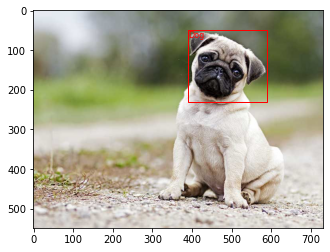

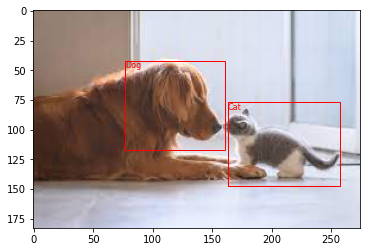

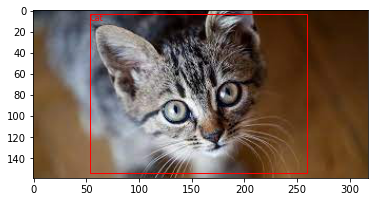

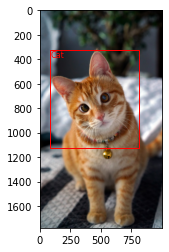

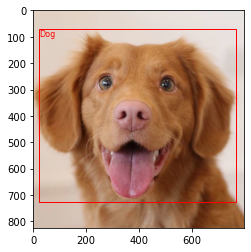

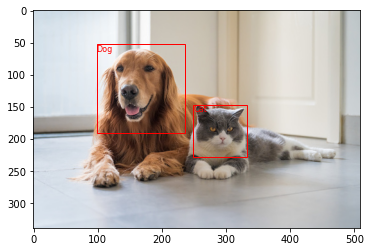

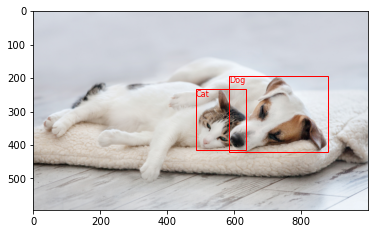

In [1]:
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Path to the JSON file
json_file = 'C:\\Users\\Shoaib\\Downloads\\cat_dog\\cat_dog.json'

# Load JSON data
with open(json_file, 'r') as f:
    json_data = json.load(f)

# Specify the path to the images
image_folder = "C:\\Users\\Shoaib\\Downloads\\cat_dog"

# Iterate over images in the JSON data
for image_id, image_data in json_data['_via_img_metadata'].items():
    # Load image
    image_filename = image_data['filename']
    image_path = os.path.join(image_folder, image_filename)
    image = Image.open(image_path)

    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(image)

    # Get bounding box information for the current image
    regions = image_data['regions']

    # Draw bounding boxes on the image
    for region in regions:
        label_name = region['region_attributes']['Name']
        x = region['shape_attributes']['x']
        y = region['shape_attributes']['y']
        width = region['shape_attributes']['width']
        height = region['shape_attributes']['height']

        # Create a rectangle patch
        rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')

        # Add the rectangle to the current axes
        ax.add_patch(rect)

        # Add label text near the bounding box
        ax.text(x, y, label_name, color='r', fontsize=8, verticalalignment='top')

    # Show the image with bounding boxes
    plt.show()
